In [29]:
#import libraries
import pandas as pd

#import dataframe
df = pd.read_csv('dataset/final_dataset/republican_democract.csv',index_col = 0)

#Define x and y
x = df.iloc[:,:-1].applymap(lambda x: float(x))
y = df.iloc[:,-1]

<p style = "font-size: 30px";>
    <b>
    Naive Bayes from sklearn
    </b>
</p>

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import cohen_kappa_score

#We will evaluate the perfomance of this two alghoritims
sk_naive = [GaussianNB(),CategoricalNB()]

#Define the method of crossvalidation
crossvalidatin_method = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 2)

#Define the metrics that we will evaluate
metrics = {'kappa': make_scorer(cohen_kappa_score), 'accuracy': 'accuracy', 'roc_auc': 'roc_auc'}
scores = []

for i in range(2):
    scores.append(cross_validate(sk_naive[i],x,y,cv = crossvalidatin_method, scoring = metrics))

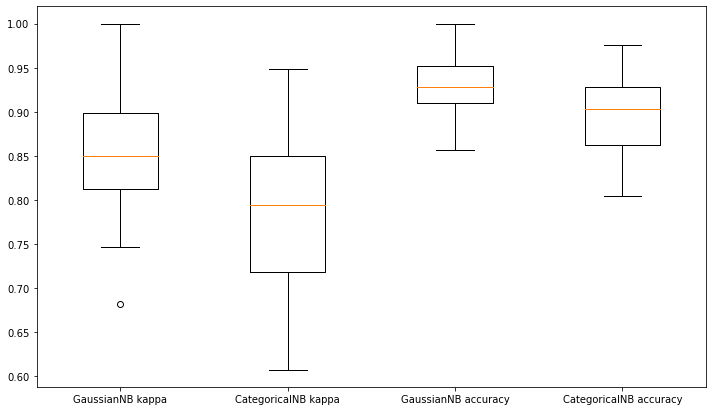

GaussianNB accuracy: 0.935      CategoricalNB accuracy: 0.9
GaussianNB kappa: 0.861      CategoricalNB kappa: 0.79
GaussianNB roc_auc: 0.975      CategoricalNB roc_auc: 0.976


In [31]:
#Visualize the results in a boxplot result
import matplotlib.pyplot  as plt
plt.figure(figsize=(12,7))
plt.boxplot([scores[0]['test_kappa'],scores[1]['test_kappa'],scores[0]['test_accuracy'],scores[1]['test_accuracy']],\
    labels = ['GaussianNB kappa','CategoricalNB kappa','GaussianNB accuracy','CategoricalNB accuracy'])
plt.show()
print(f'GaussianNB accuracy: {round((scores[0]["test_accuracy"]).mean(),3)}\
      CategoricalNB accuracy: {round(scores[1]["test_accuracy"].mean(),3)}')
print(f'GaussianNB kappa: {round((scores[0]["test_kappa"]).mean(),3)}\
      CategoricalNB kappa: {round(scores[1]["test_kappa"].mean(),3)}')
print(f'GaussianNB roc_auc: {round((scores[0]["test_roc_auc"]).mean(),3)}\
      CategoricalNB roc_auc: {round(scores[1]["test_roc_auc"].mean(),3)}')

<p style = "font-size: 18px;font-family: Times New Roman";>
    <b>
    With this results we realize that GaussianNB is better, 
    because the results are more concentrated in high values of accuracy and kappa, 
    even tough the roc_auc of the two models is very similar   
    </b>
</p>

<p style = "font-size: 30px";>
    <b>
    Naive Bayes implementation  
    </b>
</p>

In [32]:
import naive_bayes as nb

#Define the method of crossvalidation
crossvalidatin_method = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 2)

#Define the metrics that we will evaluate
metrics = {'kappa': make_scorer(cohen_kappa_score), 'accuracy': 'accuracy', 'roc_auc': 'roc_auc_ovr'}

scores = cross_validate(nb.NAIVE_BAYES(),x,y,cv = crossvalidatin_method, scoring = metrics)

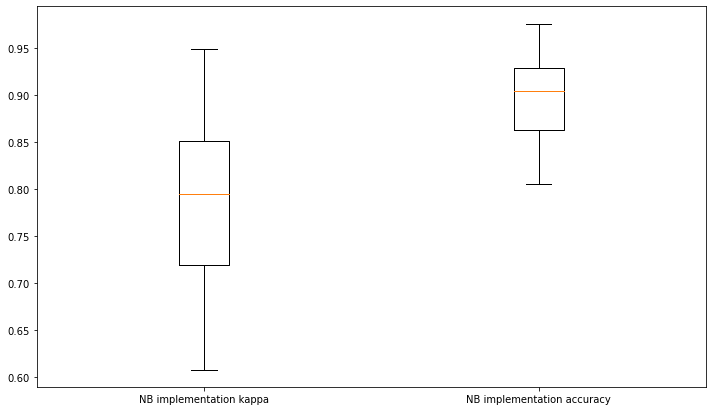

NB implementation accuracy: 0.9
NB implementation kappa: 0.79
NB implementation roc_auc: 0.976


In [33]:
#Visualize the results in a boxplot result
import matplotlib.pyplot  as plt
plt.figure(figsize=(12,7))
plt.boxplot([scores['test_kappa'],scores['test_accuracy']],\
    labels = ['NB implementation kappa','NB implementation accuracy'])
plt.show()
print(f'NB implementation accuracy: {round((scores["test_accuracy"]).mean(),3)}')
print(f'NB implementation kappa: {round((scores["test_kappa"]).mean(),3)}')
print(f'NB implementation roc_auc: {round((scores["test_roc_auc"]).mean(),3)}')

List of the most probable people to be a republicans

In [34]:
#We realize that the naive bayes implementation is the same as CateoricalNB, so we will chose GaussianNB
#Now we will test this in the test dataset to confirm that the model is not overfitted

#read dataframe
#import dataframe
df = pd.read_csv('dataset/extern_dataset/republican_democrat_test.csv')

#Substitute ? for 2, because don't vote yes or no is a behavior that can give us information
df.replace('?','2',inplace = True)
df.replace('y','1',inplace = True)
df.replace('n','0',inplace = True)

#Define x and y
x_test = df.iloc[:,:-1].applymap(lambda x: float(x))
ids = df.iloc[:,-1]

In [54]:
#Predict the classes
model = GaussianNB()
model.fit(x,y)
print(model.classes_)
probabilities = model.predict_proba(x_test)

['democrat' 'republican']


In [85]:
#create a dict
ids_proba = dict()
for id,probability in zip(ids,probabilities):
    ids_proba[id] = probability[1]

#sort the vector
sort_ids = sorted(ids_proba.items(), key = lambda x: x[1], reverse=True)
sort_ids

[(108, 0.9999998865168218),
 (112, 0.9999994432616344),
 (118, 0.9999978904488869),
 (110, 0.999997453668902),
 (106, 0.9999952820316976),
 (102, 0.9999199408981886),
 (116, 0.9970256469762652),
 (114, 0.9618487853304232),
 (104, 0.9214835989387702),
 (120, 0.5898662320498493),
 (113, 1.7195221374685625e-10),
 (111, 8.422560106112002e-11),
 (107, 7.996017414644628e-12),
 (109, 1.400788507524783e-14),
 (115, 1.0107683007028984e-14),
 (119, 7.884924766509166e-15),
 (101, 9.171648745190714e-16),
 (105, 9.171648745190714e-16),
 (103, 2.822452824547276e-16),
 (117, 2.6130260509026704e-16)]